<a href="https://colab.research.google.com/github/nachi-hebbar/ARIMA-Temperature_Forecasting/blob/master/Temperature_Forecast_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 21.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Read Data

In [ ]:
df=pd.read_csv('Data.csv',parse_dates=['startDate'])
#df=df.dropna()
print('Shape of data',df.shape)
df.head()

Shape of data (30346, 9)


,sourceName,sourceVersion,device,type,unit,creationDate,startDate,endDate,value
0,Kevin's iPhone,9.3,"<<HKDevice: 0x1c4280820>, name:iPhone, manufac...",StepCount,count,2016-04-09 14:47:16 -0500,2016-04-09 14:17:53-05:00,2016-04-09 14:23:02 -0500,34
1,Kevin's iPhone,9.3,"<<HKDevice: 0x1c428e290>, name:iPhone, manufac...",StepCount,count,2016-04-09 14:47:16 -0500,2016-04-09 14:23:02-05:00,2016-04-09 14:23:20 -0500,14
2,Kevin's iPhone,9.3,"<<HKDevice: 0x1c4280960>, name:iPhone, manufac...",StepCount,count,2016-04-09 14:47:16 -0500,2016-04-09 14:33:17-05:00,2016-04-09 14:33:33 -0500,8
3,Kevin's iPhone,9.3,"<<HKDevice: 0x1c409a770>, name:iPhone, manufac...",StepCount,count,2016-04-09 15:14:57 -0500,2016-04-09 15:02:56-05:00,2016-04-09 15:03:58 -0500,8
4,Kevin's iPhone,9.3,"<<HKDevice: 0x1c42875d0>, name:iPhone, manufac...",StepCount,count,2016-04-09 16:17:15 -0500,2016-04-09 15:36:42-05:00,2016-04-09 15:40:53 -0500,130


In [ ]:
import datetime as dt

In [ ]:
df['Date']=df['startDate'].dt.strftime('%Y-%m-%d')

In [ ]:
df

,sourceName,sourceVersion,device,type,unit,creationDate,startDate,endDate,value,Date
0,Kevin's iPhone,9.3,"<<HKDevice: 0x1c4280820>, name:iPhone, manufac...",StepCount,count,2016-04-09 14:47:16 -0500,2016-04-09 14:17:53-05:00,2016-04-09 14:23:02 -0500,34,2016-04-09
1,Kevin's iPhone,9.3,"<<HKDevice: 0x1c428e290>, name:iPhone, manufac...",StepCount,count,2016-04-09 14:47:16 -0500,2016-04-09 14:23:02-05:00,2016-04-09 14:23:20 -0500,14,2016-04-09
2,Kevin's iPhone,9.3,"<<HKDevice: 0x1c4280960>, name:iPhone, manufac...",StepCount,count,2016-04-09 14:47:16 -0500,2016-04-09 14:33:17-05:00,2016-04-09 14:33:33 -0500,8,2016-04-09
3,Kevin's iPhone,9.3,"<<HKDevice: 0x1c409a770>, name:iPhone, manufac...",StepCount,count,2016-04-09 15:14:57 -0500,2016-04-09 15:02:56-05:00,2016-04-09 15:03:58 -0500,8,2016-04-09
4,Kevin's iPhone,9.3,"<<HKDevice: 0x1c42875d0>, name:iPhone, manufac...",StepCount,count,2016-04-09 16:17:15 -0500,2016-04-09 15:36:42-05:00,2016-04-09 15:40:53 -0500,130,2016-04-09
...,...,...,...,...,...,...,...,...,...,...
30341,Kevin's iPhone,11.1.2,"<<HKDevice: 0x1c0e82530>, name:iPhone, manufac...",StepCount,count,2017-11-23 19:24:04 -0500,2017-11-23 18:35:45-05:00,2017-11-23 18:45:44 -0500,1002,2017-11-23
30342,Kevin's iPhone,11.1.2,"<<HKDevice: 0x1c0e82490>, name:iPhone, manufac...",StepCount,count,2017-11-23 19:24:04 -0500,2017-11-23 18:45:44-05:00,2017-11-23 18:55:43 -0500,674,2017-11-23
30343,Kevin's iPhone,11.1.2,"<<HKDevice: 0x1c0e823f0>, name:iPhone, manufac...",StepCount,count,2017-11-23 19:24:04 -0500,2017-11-23 18:55:43-05:00,2017-11-23 19:03:13 -0500,263,2017-11-23
30344,Kevin's iPhone,11.1.2,"<<HKDevice: 0x1c0e82350>, name:iPhone, manufac...",StepCount,count,2017-11-23 20:31:03 -0500,2017-11-23 20:18:49-05:00,2017-11-23 20:27:35 -0500,21,2017-11-23


In [ ]:
df=df[['Date','value']]
df.columns=['Date','steps']

In [ ]:
df

,Date,steps
0,2016-04-09,34
1,2016-04-09,14
2,2016-04-09,8
3,2016-04-09,8
4,2016-04-09,130
...,...,...
30341,2017-11-23,1002
30342,2017-11-23,674
30343,2017-11-23,263
30344,2017-11-23,21


In [ ]:
df['calorie']=[((36/1000)*value) for value in df['steps']]

<ipython-input-10-dea8de0cecb9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['calorie']=[((36/1000)*value) for value in df['steps']]


In [ ]:
df

,Date,steps,calorie
0,2016-04-09,34,1.224
1,2016-04-09,14,0.504
2,2016-04-09,8,0.288
3,2016-04-09,8,0.288
4,2016-04-09,130,4.680
...,...,...,...
30341,2017-11-23,1002,36.072
30342,2017-11-23,674,24.264
30343,2017-11-23,263,9.468
30344,2017-11-23,21,0.756


In [ ]:
df.set_index('Date',inplace=True)

In [ ]:
df

,steps,calorie
Date,,
2016-04-09,34,1.224
2016-04-09,14,0.504
2016-04-09,8,0.288
2016-04-09,8,0.288
2016-04-09,130,4.680
...,...,...
2017-11-23,1002,36.072
2017-11-23,674,24.264
2017-11-23,263,9.468


In [ ]:
df.drop('steps',axis=1,inplace=True)
df

,calorie
Date,
2016-04-09,1.224
2016-04-09,0.504
2016-04-09,0.288
2016-04-09,0.288
2016-04-09,4.680
...,...
2017-11-23,36.072
2017-11-23,24.264
2017-11-23,9.468


#Figure Out Order for ARIMA Model

In [ ]:
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
stepwise_fit = auto_arima(df['calorie'],
                          suppress_warnings=True)

stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                30346
Model:               SARIMAX(0, 1, 1)   Log Likelihood             -102923.164
Date:                Wed, 31 May 2023   AIC                         205850.328
Time:                        17:18:27   BIC                         205866.969
Sample:                             0   HQIC                        205855.665
                              - 30346                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2986      0.004    -84.811      0.000      -0.305      -0.292
sigma2        51.7100      0.210    246.725      0.000      51.299      52.121
===================================================================================
Ljung-Box (L1) (Q):                 274.03   Jarque-Bera (JB):             49833.70
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.46   Skew:                             0.63
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

#Split Data into Training and Testing

In [ ]:
'''# get the trainig size
tsize = int(0.80 * X.shape[0])
# split the data into test and trainig data

trainX = X[0:tsize]
testX = X[tsize:]
trainY = Y[0:tsize]
testY = Y[tsize:]'''

In [ ]:
print(df.shape)
tsize = int(0.80 * df.shape[0])
train=df.iloc[:-tsize]
test=df.iloc[-tsize:]
print(train.shape,test.shape)
print(test.iloc[0],test.iloc[-1])

(30346, 1)
(6070, 1) (24276, 1)
calorie    15.12
Name: 2016-08-10, dtype: float64 calorie    0.36
Name: 2017-11-23, dtype: float64


## Train the Model

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train['calorie'],order=(0,1,1))
model=model.fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                calorie   No. Observations:                 6070
Model:                 ARIMA(0, 1, 1)   Log Likelihood              -19165.094
Date:                Wed, 31 May 2023   AIC                          38334.187
Time:                        17:24:05   BIC                          38347.609
Sample:                             0   HQIC                         38338.845
                               - 6070                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2270      0.011    -20.718      0.000      -0.248      -0.206
sigma2        32.3899      0.414     78.245      0.000      31.579      33.201
===================================================================================
Ljung-Box (L1) (Q):                   9.91   Jarque-Bera (JB):              1191.69
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.97   Skew:                             0.24
Prob(H) (two-sided):                  0.52   Kurtosis:                         5.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#Make Predictions on Test Set

<Axes: xlabel='Date'>

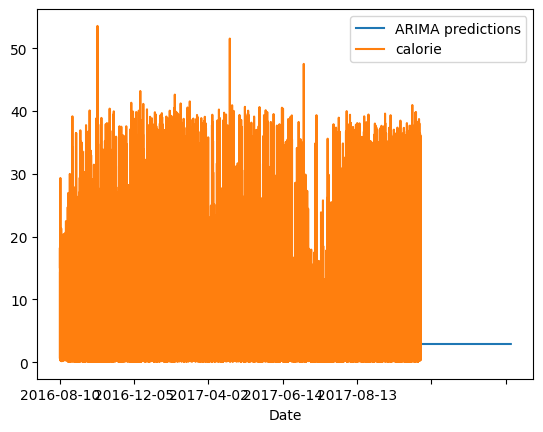

In [ ]:
start=len(train)
end=len(train)+len(test)-1
#if the predicted values dont have date values as index, you will have to uncomment the following two commented lines to plot a graph
#index_future_dates=pd.date_range(start='2018-12-01',end='2018-12-30')
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA predictions')
#pred.index=index_future_dates
pred.plot(legend=True)
test['calorie'].plot(legend=True)


<Axes: xlabel='Date'>

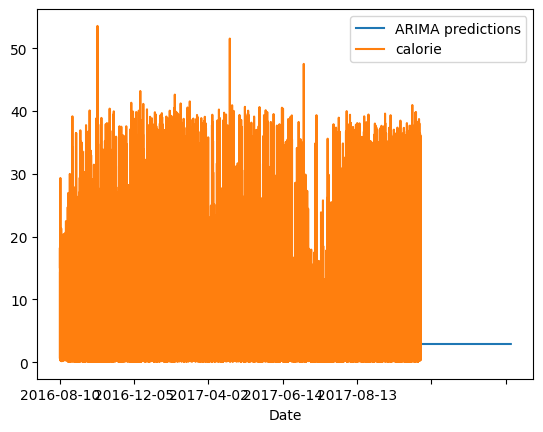

In [ ]:
pred.plot(legend='ARIMA Predictions')
test['calorie'].plot(legend=True)

In [ ]:
test['calorie'].mean()

5.029386554621849

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['calorie']))
print(rmse)


8.107753448654696


In [ ]:
model2=ARIMA(df['calorie'],order=(1,0,5))
model2=model2.fit()
df.tail()

,calorie
Date,
2017-11-23,36.072
2017-11-23,24.264
2017-11-23,9.468
2017-11-23,0.756
2017-11-23,0.360


#For Future Dates

In [ ]:
index_future_dates=pd.date_range(start='2017-11-24',end='2017-11-30')
#print(index_future_dates)
pred=model2.predict(start=len(df),end=len(df)+6,typ='levels').rename('ARIMA Predictions')
#print(comp_pred)
pred.index=index_future_dates
print(pred)

2017-11-24    2.886698
2017-11-25    4.373120
2017-11-26    4.992054
2017-11-27    5.212706
2017-11-28    5.248325
2017-11-29    5.239448
2017-11-30    5.234792
Freq: D, Name: ARIMA Predictions, dtype: float64


<Axes: >

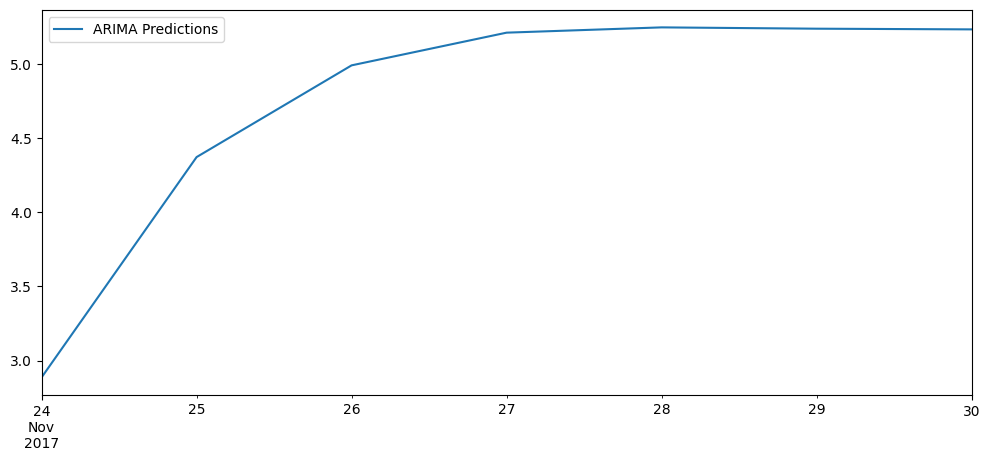

In [ ]:
pred.plot(figsize=(12,5),legend=True)
